# Purpose
This notebook describes the typical activities carried out  at the beginning to a project / thread when customer shares new data. We will be trying to understand the tables, columns and information flow. Typically we also look for data issues and confirm with respective owners for resolution. At the end of this activity, the data sources and their treatment is finalized. Code in this notebook will not be part of the production code.

This data can be downloaded from
[here](https://drive.google.com/file/d/11DqcBxxEcn3QA4YvPQmmExBm-m6AgUQ_/view?usp=sharing)

**NOTE**:
Download the data from the above link, and copy the extracted csv files to the path `data/raw/sales/` (relative to root of the code archive folder). Make sure to copy the files before continuing on with the rest of the notebook.

# Initialization

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
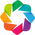

CPU times: user 18.3 s, sys: 561 ms, total: 18.9 s
Wall time: 20.5 s


In [4]:
%%time

# Third-party imports
import os.path as op
import pandas as pd
import great_expectations as ge

# Project imports
from ta_lib.core.api import display_as_tabs, initialize_environment

# Initialization
initialize_environment(debug=False, hide_warnings=True)

# Data

## Background

Customer is a distributor of electronic devices. They partner with manufacturers, carriers and refurbishers and sell across to  retailers. The selling price is the outcome of negotiation between sales representatives and retailers. Customer wants to understand the selling price variation and determine  optimal pricing with Machine Learning.

In [5]:
from ta_lib.core.api import create_context, list_datasets, load_dataset

In [6]:
config_path = op.join('conf', 'config.yml')
context = create_context(config_path)

In [7]:
list_datasets(context)

['/raw/housing',
 '/cleaned/housing',
 '/processed/housing',
 '/train/housing/features',
 '/train/housing/target',
 '/test/housing/features',
 '/test/housing/target',
 '/score/housing/output']

In [8]:
# load datasets
housing_df = load_dataset(context, 'raw/housing')


In [9]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Exploratory Analysis

Given the raw data from data ingestion, we would now like to explore and learn more details about the data.


The output of the step would be a summary report and discussion of any pertinent findings.


In [10]:
# Import the eda API
import ta_lib.eda.api as eda

## Variable summary

In [11]:
display_as_tabs([('housing', housing_df.shape)])

BokehModel(combine_events=True, render_bundle={'docs_json': {'991ec937-0a6e-4217-bded-2d304770c62f': {'version…

In [12]:
sum_h = eda.get_variable_summary(housing_df)

display_as_tabs([('housing', sum_h)])

BokehModel(combine_events=True, render_bundle={'docs_json': {'86d01abe-761b-49a5-98b9-2b0561242ee5': {'version…

In [13]:
housing_df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

**Dev NOTES**

<details>
1. Datatypes : We have both numeric and other types. The bulk of them seem to be numeric. `Numeric` is defined to be one of [float|int|date] and the rest are categorized as `Others`. A column is assumed to have `date` values if it has the string `date` in the column name.


## Health Analysis

Get an overview of the overall health of the dataset. This is usually quick to compute and hopefully highlights some problems to focus on.



### Summary Plot

Provides a high level summary of the dataset health.

**Watch out for:**

* too few numeric values
* high % of missing values
* high % of duplicate values
* high % of duplicate columns 

In [14]:
sum_h, plot_h = eda.get_data_health_summary(housing_df, return_plot=True)

display_as_tabs([('housing', plot_h)])

'params' has been deprecated and will be removed in a future version. Use instead `.param.values()` or `.param['param']`

'params' has been deprecated and will be removed in a future version. Use instead `.param.values()` or `.param['param']`

'params' has been deprecated and will be removed in a future version. Use instead `.param.values()` or `.param['param']`

'params' has been deprecated and will be removed in a future version. Use instead `.param.values()` or `.param['param']`



BokehModel(combine_events=True, render_bundle={'docs_json': {'f1742224-7e1e-4b36-ad26-7fd09343404d': {'version…

**Dev NOTES**

<details>
1. Datatypes : We have both numeric and other types. The bulk of them seem to be numeric. `Numeric` is defined to be one of [float|int|date] and the rest are categorized as `Others`. A column is assumed to have `date` values if it has the string `date` in the column name.

2. The missing value plot seems to indicate missing values are not present but we do have them. 

3. We are looking for duplicate observations (rows in the data). The plot shows the % of rows that are an exact replica of another row (using `df.duplicated`)

4. We are looking for duplicate features (columns in the data).

</details>

### Missing Values summary

This provides an overall view focussing on amount of missing values in the dataset.

**Watch out for:**
* A few columns have significant number of missing values 
* Most columns have significant number of missing values


In [15]:
sum_h, plot_h = eda.get_missing_values_summary(housing_df, return_plot=True)

display_as_tabs([('housing', plot_h)])

'params' has been deprecated and will be removed in a future version. Use instead `.param.values()` or `.param['param']`

Cannot compute missing_plot. Error - Having a non-string as a column name in a DataFrame is not supported.
Traceback (most recent call last):
  File "/home/sathwika/miniconda3/envs/templates_demo-dev/lib/python3.10/site-packages/hvplot/converter.py", line 1211, in __call__
    dataset = Dataset(data, self.indexes)
  File "/home/sathwika/miniconda3/envs/templates_demo-dev/lib/python3.10/site-packages/holoviews/core/data/__init__.py", line 329, in __init__
    initialized = Interface.initialize(type(self), data, kdims, vdims,
  File "/home/sathwika/miniconda3/envs/templates_demo-dev/lib/python3.10/site-packages/holoviews/core/data/interface.py", line 253, in initialize
    (data, dims, extra_kws) = interface.init(eltype, data, kdims, vdims)
  File "/home/sathwika/miniconda3/envs/templates_demo-dev/lib/python3.10/site-packages/holoviews/core/data/pandas.py", line 73, i

BokehModel(combine_events=True, render_bundle={'docs_json': {'d7fb20a7-b86a-48af-afe8-748b82be671a': {'version…

**Dev notes:**

<details>
    
    * By default, the following are considered missing/NA values : `[np.Nan, pd.NaT, 'NA', None]`
    * additional values can be passed to tigerml (add_additional_na_values)
    * these are applied to all columns.
    
    * some of the above information can be learnt from the data discovery step (see discussion below)
    
</details>

In [16]:
sum_h= eda.get_duplicate_columns(housing_df)

display_as_tabs([('housing', sum_h)])

BokehModel(combine_events=True, render_bundle={'docs_json': {'c1a73b23-f617-4725-80cd-b62cb712489f': {'version…

In [17]:
sum_h= eda.get_outliers(housing_df)

display_as_tabs([('housing', sum_h)])

BokehModel(combine_events=True, render_bundle={'docs_json': {'1ac3d46e-cda6-4193-8902-28cab9c59752': {'version…

## Health Analysis report

Generate a report that has all the above data in a single html. This could be useful to submit to a client

In [18]:
from ta_lib.reports.api import summary_report

summary_report(housing_df, './housing_price.html')

'params' has been deprecated and will be removed in a future version. Use instead `.param.values()` or `.param['param']`

'params' has been deprecated and will be removed in a future version. Use instead `.param.values()` or `.param['param']`

'params' has been deprecated and will be removed in a future version. Use instead `.param.values()` or `.param['param']`

'params' has been deprecated and will be removed in a future version. Use instead `.param.values()` or `.param['param']`

'params' has been deprecated and will be removed in a future version. Use instead `.param.values()` or `.param['param']`

Cannot compute missing_plot. Error - Having a non-string as a column name in a DataFrame is not supported.
Traceback (most recent call last):
  File "/home/sathwika/miniconda3/envs/templates_demo-dev/lib/python3.10/site-packages/hvplot/converter.py", line 1211, in __call__
    dataset = Dataset(data, self.indexes)
  File "/home/sathwika/miniconda3/envs/templates_demo-dev/lib/python3.10/s